<a href="https://colab.research.google.com/github/skywalker00001/TEXT_assignment/blob/main/houy_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
root = 'drive/MyDrive/TEXT_assignment/'

Mounted at /content/drive


In [177]:
import json
import random
import string
from collections import defaultdict
from matplotlib import pyplot as plt 

SEED = 2
random.seed(SEED)

In [43]:
# Install the required packages for this lab


!pip install nltk
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.tag import pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
business_id = []

with open(root + 'yelp_academic_dataset_business.json', encoding='utf-8') as f:
    for line in f:
        line_contents = json.loads(line)
        business_id.append(line_contents['business_id'])
        # business_id.append(line_contents)
        # id = line_contents['business_id']
        # print(id)
    f.close()

In [178]:
random.seed(SEED)
b1 = random.randint(0, len(business_id))
b1_id = business_id[b1]
print(b1)
print(b1_id)

14824
PyWyXv_pe5Rx4NRROFMm4w


In [179]:
b1_reviews = []

with open(root + 'yelp_academic_dataset_review.json', encoding='utf-8') as f:
    for line in f:
        line_contents = json.loads(line)
        if (line_contents['business_id'] == b1_id):
            b1_reviews.append(line_contents['text'])
    f.close()

In [180]:
print(len(b1_reviews))

34


In [181]:
print(b1_reviews[0])

This place is great! Prices are very reasonable and the guys there are knowlegable and curious. They got the work done pretty fast and they even gave me a ride to my work when I dropped my truck off. I will definitely go here for cuter tire stuff.


In [182]:
b1_tokens = []

for review in b1_reviews:
    tokens = word_tokenize(review)
    b1_tokens.append(tokens)

In [183]:
vocabulary = []
for review in b1_tokens:
    for token in review:
        vocabulary.append(token.lower())

print(len(vocabulary))
vocabulary = set(vocabulary)
print(len(vocabulary))

4678
1041


In [184]:
print(vocabulary)

{'going', 'shop', 'unnecessary', 'five', 'rest', 'around', 'blessed', 'include', 'things', 'comfortable', 'ones', 'off', 'in', 'pulled', 'glad', 'talk', 'passed', 'half', 'ranger', 'focused', 'worth', 'ball-joints', 'range', 'smalls', 'some', 'developed', 'same', 'house', 'owner', 'such', 'decided', 'area', 'return', 'match', 'assessed', 'here', 'looked', 'remove', 'too', 'plan', 'missed', 'gotten', 'canister', 'go', 'repair/replace', 'has', 'will', 'mentally', 'efficient', 'service', 'stranded', 'partial', 'full-size', 'boggling', 'independent', 'pump', 'less', 'cuter', 'away', 'mileage', 'swiftly', 'notice', 'rock', 'attached', 'office', 'city', 'overall', 'quickly', 'talking', 'overcharge', 'mounting', 'prepared', 'lot', 'sure', 'any', 'prices', 'mount', 'juan', 'schedule', 'discovered', 'my', 'ripped', 'where', 'saying', 'kept', ':', 'plug', 'technician', 'accommodating', 'said', 'scope', 'parking', 'one', 'skilled', 'throughout', 'else', 'times', 'because', 'young', 'codes', 'trav

In [185]:
word_freq = defaultdict(int)
for review in b1_tokens:
    for token in review:
        word_freq[token.lower()] += 1
print(len(word_freq))
print(word_freq)

1041
defaultdict(<class 'int'>, {'this': 18, 'place': 8, 'is': 29, 'great': 6, '!': 43, 'prices': 4, 'are': 11, 'very': 15, 'reasonable': 3, 'and': 162, 'the': 171, 'guys': 11, 'there': 4, 'knowlegable': 1, 'curious': 1, '.': 195, 'they': 66, 'got': 5, 'work': 17, 'done': 9, 'pretty': 1, 'fast': 6, 'even': 14, 'gave': 7, 'me': 50, 'a': 118, 'ride': 5, 'to': 154, 'my': 61, 'when': 12, 'i': 141, 'dropped': 3, 'truck': 1, 'off': 11, 'will': 8, 'definitely': 3, 'go': 12, 'here': 6, 'for': 41, 'cuter': 1, 'tire': 8, 'stuff': 2, 'was': 56, 'impressed': 2, 'with': 31, 'gary': 46, "'s": 50, ',': 122, 'am': 5, 'naturally': 1, 'skeptical': 1, 'of': 62, 'mechanics': 8, 'car': 44, 'has': 6, 'been': 7, 'looked': 1, 'at': 16, 'by': 5, 'menagerie': 1, 'all': 13, 'over': 6, 'ca': 4, 'or': 9, 'including': 2, 'no': 8, 'less': 7, 'than': 9, 'five': 2, 'different': 2, 'ford': 4, 'dealers': 1, 'several': 5, 'smalls': 1, 'shops': 4, 'had': 33, 'check': 10, 'engine': 22, 'light': 8, 'on': 49, 'year': 3, 'it'

In [186]:
ordered_freq = sorted(word_freq.items(), key = lambda x: x[1], reverse=True)
print(ordered_freq)

[('.', 195), ('the', 171), ('and', 162), ('to', 154), ('i', 141), (',', 122), ('a', 118), ('they', 66), ('of', 62), ('my', 61), ('was', 56), ('me', 50), ("'s", 50), ('on', 49), ('in', 47), ('gary', 46), ('car', 44), ('it', 44), ('!', 43), ('for', 41), ('had', 33), ('with', 31), ('is', 29), ('back', 25), (')', 25), ('auto', 25), ('that', 24), ('(', 24), ('do', 23), ('engine', 22), ("n't", 22), ('have', 21), ('an', 20), ('did', 19), ('this', 18), ('up', 18), ('care', 18), ('be', 18), ('work', 17), ('at', 16), ('shop', 16), ('very', 15), ('about', 15), ('out', 15), ('you', 15), ('even', 14), ('but', 14), ('so', 14), ('them', 14), ('service', 14), ('all', 13), ('took', 13), ('were', 13), ('from', 13), ('$', 13), ('when', 12), ('go', 12), ('one', 12), ('their', 12), ('if', 12), ('not', 12), ('what', 12), ('repair', 12), ('our', 12), ('are', 11), ('guys', 11), ('off', 11), ('after', 11), ('``', 11), ("''", 11), ('just', 11), ('we', 11), ('jeff', 11), ('as', 11), ('check', 10), ('valve', 10),

In [187]:
stop_words_list = stopwords.words('english')
stop_words_list.append('\'s')
stop_words_list.append('n\'t')
print(stop_words_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [188]:
exclude_stopwords_freq = []
for (key, value) in ordered_freq:
    if (key not in stop_words_list) and (key not in string.punctuation):
        exclude_stopwords_freq.append((key, value))

In [189]:
print(exclude_stopwords_freq)

[('gary', 46), ('car', 44), ('back', 25), ('auto', 25), ('engine', 22), ('care', 18), ('work', 17), ('shop', 16), ('even', 14), ('service', 14), ('took', 13), ('go', 12), ('one', 12), ('repair', 12), ('guys', 11), ('``', 11), ("''", 11), ('jeff', 11), ('check', 10), ('valve', 10), ('charge', 10), ('get', 10), ('would', 10), ('done', 9), ('always', 9), ('mechanic', 9), ('bolt', 9), ('place', 8), ('tire', 8), ('mechanics', 8), ('light', 8), ('without', 8), ('said', 8), ('know', 8), ('first', 8), ('time', 8), ('right', 8), ('like', 8), ('gave', 7), ('less', 7), ('job', 7), ('vehicle', 7), ('never', 7), ('problems', 7), ('called', 7), ('business', 7), ('tires', 7), ('replace', 7), ('much', 7), ('great', 6), ('fast', 6), ('came', 6), ('issue', 6), ('things', 6), ('price', 6), ('part', 6), ('little', 6), ('needed', 6), ('problem', 6), ('dan', 6), ('friendly', 6), ('cost', 6), ('able', 6), ('2', 6), ('also', 6), ("'re", 6), ('new', 6), ('next', 6), ('brought', 6), ('felt', 6), ('transmission'

In [190]:
def autolabel(rects): 
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, "%i" % int(height))

[46, 44, 25, 25, 22, 18, 17, 16, 14, 14]


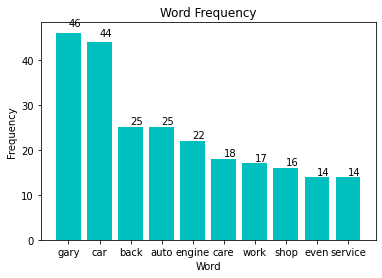

In [191]:

x = []
y = []

for (key, value) in exclude_stopwords_freq[0:10]:
    x.append(key)
    y.append(value)
#x =  exclude_stopwords_freq[0: 10][0]
# y =  exclude_stopwords_freq[0: 10]
print(y)

autolabel(plt.bar(range(len(x)), y, color='c', align = 'center', tick_label=x) )
plt.title('Word Frequency') 
plt.xlabel('Word') 
plt.ylabel('Frequency') 
plt.show()

# Stemming


In [198]:
 # STEMMING
from nltk.stem import PorterStemmer

porter = PorterStemmer()

stemming_word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}".format("Word","Stemmed variant"))
print()

for word in stemming_word_list:
      print("{0:20}{1:20}".format(word,porter.stem(word)))

Word                Stemmed variant     

friend              friend              
friendship          friendship          
friends             friend              
friendships         friendship          
stabil              stabil              
destabilize         destabil            
misunderstanding    misunderstand       
railroad            railroad            
moonlight           moonlight           
football            footbal             


In [ ]:
word_freq = defaultdict(int)
for review in b1_tokens:
    for token in review:
        word_freq[token.lower()] += 1
print(len(word_freq))
print(word_freq)

# POS Tagging

In [192]:
s1 = b1_reviews[0]
print(s1)

This place is great! Prices are very reasonable and the guys there are knowlegable and curious. They got the work done pretty fast and they even gave me a ride to my work when I dropped my truck off. I will definitely go here for cuter tire stuff.


In [193]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [194]:
  s1 = word_tokenize(s1)
  print(s1)
  s1 = nltk.pos_tag(s1)
  print(s1)

['This', 'place', 'is', 'great', '!', 'Prices', 'are', 'very', 'reasonable', 'and', 'the', 'guys', 'there', 'are', 'knowlegable', 'and', 'curious', '.', 'They', 'got', 'the', 'work', 'done', 'pretty', 'fast', 'and', 'they', 'even', 'gave', 'me', 'a', 'ride', 'to', 'my', 'work', 'when', 'I', 'dropped', 'my', 'truck', 'off', '.', 'I', 'will', 'definitely', 'go', 'here', 'for', 'cuter', 'tire', 'stuff', '.']
[('This', 'DT'), ('place', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), ('!', '.'), ('Prices', 'NNS'), ('are', 'VBP'), ('very', 'RB'), ('reasonable', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('guys', 'NNS'), ('there', 'EX'), ('are', 'VBP'), ('knowlegable', 'JJ'), ('and', 'CC'), ('curious', 'JJ'), ('.', '.'), ('They', 'PRP'), ('got', 'VBD'), ('the', 'DT'), ('work', 'NN'), ('done', 'VBN'), ('pretty', 'RB'), ('fast', 'JJ'), ('and', 'CC'), ('they', 'PRP'), ('even', 'RB'), ('gave', 'VBD'), ('me', 'PRP'), ('a', 'DT'), ('ride', 'NN'), ('to', 'TO'), ('my', 'PRP$'), ('work', 'NN'), ('when', 'WRB'), ('I'

In [197]:
import spacy
  
# Load English tokenizer, tagger, 
# parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
  
# Process whole documents
text = b1_reviews[0]
  
doc = nlp(text)
  
# Token and Tag
for token in doc:
  print(token, token.pos_)

This DET
place NOUN
is AUX
great ADJ
! PUNCT
Prices NOUN
are AUX
very ADV
reasonable ADJ
and CCONJ
the DET
guys NOUN
there PRON
are AUX
knowlegable ADJ
and CCONJ
curious ADJ
. PUNCT
They PRON
got VERB
the DET
work NOUN
done VERB
pretty ADV
fast ADV
and CCONJ
they PRON
even ADV
gave VERB
me PRON
a DET
ride NOUN
to ADP
my DET
work NOUN
when ADV
I PRON
dropped VERB
my DET
truck NOUN
off ADP
. PUNCT
I PRON
will VERB
definitely ADV
go VERB
here ADV
for ADP
cuter PROPN
tire PROPN
stuff NOUN
. PUNCT
